In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# Make a list of files for easy iterating

import glob
patient_files = glob.glob('training/*.psv')
len(patient_files)

5000

In [3]:
# Make the dictionary with first hour of diagnosis of sepsis as keys 
# and number of corresponding people as values 

# Also make a list of files of patients with and without Sepsis

first_hour = {}
sepsis_files = []
no_sepsis_files = []

first_hour['No Sepsis'] = 0
for file in patient_files:
    patient = pd.read_csv(file, sep='|')
    if 1 not in list(patient['SepsisLabel']):
        no_sepsis_files.append(file)
        first_hour['No Sepsis'] += 1
    else:
        sepsis_files.append(file)
        for idx, label in enumerate(patient['SepsisLabel']):
            if label == 1:
                hour = patient.loc[idx]['ICULOS'] 
                if hour not in first_hour:
                    first_hour[hour] = 0
                first_hour[hour] += 1
                break
first_hour

{'No Sepsis': 4721,
 1.0: 56,
 104.0: 2,
 180.0: 1,
 48.0: 2,
 34.0: 2,
 4.0: 5,
 27.0: 6,
 78.0: 2,
 90.0: 3,
 31.0: 1,
 154.0: 1,
 240.0: 1,
 122.0: 2,
 46.0: 2,
 91.0: 1,
 2.0: 6,
 158.0: 1,
 32.0: 4,
 20.0: 2,
 6.0: 5,
 55.0: 2,
 71.0: 2,
 57.0: 1,
 19.0: 4,
 3.0: 7,
 61.0: 3,
 14.0: 6,
 10.0: 1,
 139.0: 2,
 331.0: 1,
 7.0: 8,
 24.0: 5,
 108.0: 1,
 28.0: 3,
 121.0: 1,
 45.0: 3,
 16.0: 3,
 149.0: 1,
 54.0: 2,
 17.0: 2,
 84.0: 4,
 47.0: 3,
 30.0: 5,
 23.0: 4,
 33.0: 2,
 38.0: 2,
 198.0: 2,
 129.0: 1,
 5.0: 4,
 85.0: 1,
 9.0: 4,
 39.0: 3,
 83.0: 2,
 37.0: 2,
 135.0: 1,
 25.0: 2,
 36.0: 1,
 13.0: 5,
 60.0: 1,
 53.0: 2,
 35.0: 2,
 95.0: 1,
 68.0: 1,
 120.0: 1,
 181.0: 1,
 81.0: 2,
 40.0: 3,
 123.0: 2,
 243.0: 1,
 41.0: 1,
 21.0: 1,
 52.0: 2,
 29.0: 1,
 209.0: 1,
 62.0: 1,
 92.0: 2,
 63.0: 1,
 26.0: 3,
 75.0: 1,
 42.0: 1,
 155.0: 1,
 100.0: 1,
 156.0: 1,
 74.0: 1,
 79.0: 1,
 110.0: 2,
 251.0: 1,
 196.0: 1,
 12.0: 2,
 101.0: 1,
 69.0: 1,
 18.0: 2,
 93.0: 1,
 44.0: 1,
 224.0: 1,
 300.0: 1,

In [4]:
new_first_hour = defaultdict(int)
for hour in list(first_hour.keys())[1:]:
    if hour <= 19:
        new_first_hour['0-20 Hours'] +=first_hour[hour]
        
    if hour >=20 and hour <= 39:
        new_first_hour['20-40 Hours'] +=first_hour[hour]
    
    if hour >=40 and hour <= 59:
        new_first_hour['40-60 Hours'] +=first_hour[hour]
    
    if hour >=60 and hour <= 79:
        new_first_hour['60-80 Hours'] +=first_hour[hour]
    
    if hour >=80 and hour <= 99:
        new_first_hour['80-100 Hours'] +=first_hour[hour]
    
    if hour >=100 and hour <= 119:
        new_first_hour['100-119 Hours'] +=first_hour[hour]
    
    if hour >=120 and hour <= 139:
        new_first_hour['120-140 Hours'] +=first_hour[hour]
    
    if hour >=140 and hour <= 159:
        new_first_hour['140-160 Hours'] +=first_hour[hour]
    
    if hour >=160 and hour <= 179:
        new_first_hour['160-180 Hours'] +=first_hour[hour]
    
    if hour >=180 and hour <= 199:
        new_first_hour['180-200 Hours'] +=first_hour[hour]
    
    if hour >=200:
        new_first_hour['200+ Hours'] +=first_hour[hour]
        
new_first_hour

defaultdict(int,
            {'0-20 Hours': 123,
             '100-119 Hours': 10,
             '180-200 Hours': 6,
             '40-60 Hours': 28,
             '20-40 Hours': 51,
             '60-80 Hours': 17,
             '80-100 Hours': 19,
             '140-160 Hours': 5,
             '200+ Hours': 10,
             '120-140 Hours': 10})

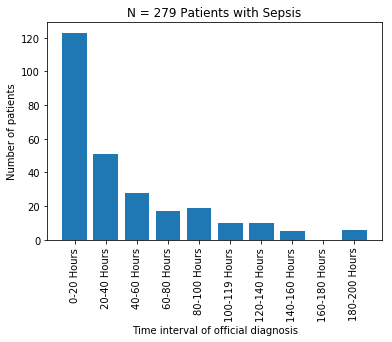

In [5]:
# Bar plot that shows how many hours after ICU admission do patients get official sepsis diagnosis

order = ['0-20 Hours', '20-40 Hours', '40-60 Hours', '60-80 Hours', '80-100 Hours',
        '100-119 Hours', '120-140 Hours', '140-160 Hours', '160-180 Hours', '180-200 Hours']
count = [new_first_hour[interval] for interval in order]

plt.bar(order,count)
plt.xticks(rotation=90)
plt.title('N = 279 Patients with Sepsis')
plt.xlabel('Time interval of official diagnosis')
plt.ylabel('Number of patients')
plt.show()

In [6]:
# EXAMPLE 
test = pd.read_csv('training/p01111.psv', sep='|')
test

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,45,1,0,1,-11.05,1,0
1,78.0,99.0,37.5,112.0,78.0,55.0,12.0,NaN,NaN,NaN,...,12.5,NaN,251.0,45,1,0,1,-11.05,2,0
2,69.5,99.5,NaN,99.5,72.5,53.5,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45,1,0,1,-11.05,3,0
3,70.0,99.0,37.6,106.0,75.5,54.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45,1,0,1,-11.05,4,0
4,67.0,97.0,NaN,95.0,71.5,55.5,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45,1,0,1,-11.05,5,0
5,67.0,97.0,NaN,96.5,72.0,54.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45,1,0,1,-11.05,6,0
6,67.0,98.5,NaN,106.5,73.5,55.5,13.5,NaN,NaN,NaN,...,NaN,NaN,NaN,45,1,0,1,-11.05,7,0
7,64.0,98.0,37.3,102.5,75.0,57.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45,1,0,1,-11.05,8,0
8,64.0,97.5,NaN,103.0,74.5,56.5,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45,1,0,1,-11.05,9,0
9,62.0,98.0,NaN,101.0,75.0,59.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45,1,0,1,-11.05,10,0


In [20]:
test.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [ ]:
# https://tbiomed.biomedcentral.com/articles/10.1186/1742-4682-8-40
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6299613/pdf/13054_2018_Article_2279.pdf

# Standardize Candidate Feature Formatting
# There are fixed intervals (vital signs like HR and temp), and non-standard intervals (platelets and WBC)

# Vital signs (columns 1-8) -> Time Series features 
# Laboratory values (columns 9-34) -> Multivariate features 
# Personal info (columns 35-40) -> Demographic features

# Time Series
# Fill NaN values with mean values 


# Notes:
# Deal with the imbalance
# create a was_analyzed features
# a lag

# Notes: 
# Systolic should always be greater than diastolic by definition. 

# 'HR'
# 'O2Sat'
# 'Temp',
# 'SBP',
# 'MAP',
# 'DBP',
# 'Resp',
# 'EtCO2',

# Multivariate features 
# Literature says to use the most recent multivariate features before onset of sepsis, but there are some values where
# I may want to forward/backward fill

 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Chloride',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'Hct',
 'Hgb',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',


# Demographic features

# 'Age' -> One value
# 'Gender', -> One value 
# 'Unit1', -> I say ignore
# 'Unit2', -> I say ignore
# 'HospAdmTime', -> I say ignore 
# 'ICULOS', -> Must be useful somewhere


# Clinical latent features (can be treated like time series)

# Shock index = HR/SBP
# O2 Delivery index = HR*(SBP-DBP)*Hgb*SPO2

# Trend features of time series
# Max, min, mean, mode, median, slope, intercept

# Predictor variable

# SepsisLabel

In [7]:
# Handling the missing data

TS_features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']
MV_features = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

# TS features
for feature in TS_features:
    test[feature].fillna((test[feature].mean()), inplace=True)

# MV feaatures
test[MV_features] = test[MV_features].fillna(method='ffill')
test[MV_features] = test[MV_features].fillna(method='bfill')

test.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,70.688679,97.294118,37.45,144.528302,98.788462,71.556604,12.888889,37.302632,NaN,NaN,...,12.5,NaN,251.0,45,1,0,1,-11.05,1,0
1,78.000000,99.000000,37.50,112.000000,78.000000,55.000000,12.000000,37.302632,NaN,NaN,...,12.5,NaN,251.0,45,1,0,1,-11.05,2,0
2,69.500000,99.500000,37.45,99.500000,72.500000,53.500000,12.000000,37.302632,NaN,NaN,...,12.5,NaN,251.0,45,1,0,1,-11.05,3,0
3,70.000000,99.000000,37.60,106.000000,75.500000,54.000000,12.000000,37.302632,NaN,NaN,...,12.5,NaN,251.0,45,1,0,1,-11.05,4,0
4,67.000000,97.000000,37.45,95.000000,71.500000,55.500000,12.000000,37.302632,NaN,NaN,...,12.5,NaN,251.0,45,1,0,1,-11.05,5,0


In [ ]:
#Prelim attempt to make a usable dataframe for ML

# Create two main dataframes, one with all rows pertaining to patients WITH sepsis, and one WITHOUT 
yes_sepsis = []
no_sepsis = []


# Handling the missing data

TS_features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']
MV_features = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']


for patientID, file in enumerate(patient_files):
    patient = pd.read_csv(file, sep='|')
    patient['ID'] = patientID
       
    for feature in TS_features:
        # Filling NaN values for TS features
        patient[feature].fillna((patient[feature].mean()), inplace = True)
        
        # Add 1-hour lag feature for TS features 
        # patient['lag_1hour'] = 

    # Filling NaN values for MV features
    patient[MV_features] = patient[MV_features].fillna(method='ffill')
    patient[MV_features] = patient[MV_features].fillna(method='bfill')
    
    # Add clinical latent features: Shock Index and Oxygen Delivery Index
    #patient['Shock_Index'] = patient['HR']/patient['SBP']
    #patient['Oxygen_Delivery_Index'] = patient['HR']*(patient['SBP']-patient['DBP'])*patient['Hgb']*patient['O2Sat']

    if 1 not in list(patient['SepsisLabel']):
        patient['Hours_until_sepsis'] = 0
        no_sepsis.append(patient)
    else:
        patient = patient[patient['SepsisLabel']==0]
        patient['Hours_until_sepsis'] = [i+1 for i in list(reversed(range(patient.shape[0])))]
        patient = patient[(patient['Hours_until_sepsis'] > 0) & (patient['Hours_until_sepsis'] <= 6)]
        yes_sepsis.append(patient)
        

df_no_sepsis = pd.concat(no_sepsis, ignore_index=True)
df_yes_sepsis = pd.concat(yes_sepsis, ignore_index=True)

# Establish the training and test sets, we NO DOT want rows from patient X showing up in both sets
# We also want to make sure there are adequate cases for both outcomes in both sets
train_no_sepsis = df_no_sepsis[df_no_sepsis['ID'] < int(len(df_no_sepsis.shape[0])*0.66)]
test_no_sepsis = df_no_sepsis[df_no_sepsis['ID'] >= int(len(df_no_sepsis.shape[0])*0.66)]

train_yes_sepsis = df_yes_sepsis[df_yes_sepsis['ID'] < int(len(df_yes_sepsis.shape[0])*0.66)]
test_yes_sepsis = df_yes_sepsis[df_yes_sepsis['ID'] >= int(len(df_yes_sepsis.shape[0])*0.66)]

train = pd.concat([train_no_sepsis, train_yes_sepsis], ignore_index=True)
test = pd.concat([test_no_sepsis, test_yes_sepsis], ignore_index=True)

In [ ]:
X_train = train.drop(['ID','Hours_until_sepsis'], axis = 1)
X_test = test.drop(['ID','Hours_until_sepsis'], axis = 1)
y_train = train['Hours_until_sepsis']
y_test = test['Hours_until_sepsis']

In [6]:
#!/usr/bin/env python3

import sys
import numpy as np


def get_sepsis_score(values, column_names):
    x_mean = np.array([
        83.8996, 97.0520,  36.8055,  126.2240, 86.2907,
        66.2070, 18.7280,  33.7373,  -3.1923,  22.5352,
        0.4597,  7.3889,   39.5049,  96.8883,  103.4265,
        22.4952, 87.5214,  7.7210,   106.1982, 1.5961,
        0.6943,  131.5327, 2.0262,   2.0509,   3.5130,
        4.0541,  1.3423,   5.2734,   32.1134,  10.5383,
        38.9974, 10.5585,  286.5404, 198.6777])
    x_std = np.array([
        17.6494, 3.0163,  0.6895,   24.2988, 16.6459,
        14.0771, 4.7035,  11.0158,  3.7845,  3.1567,
        6.2684,  0.0710,  9.1087,   3.3971,  430.3638,
        19.0690, 81.7152, 2.3992,   4.9761,  2.0648,
        1.9926,  45.4816, 1.6008,   0.3793,  1.3092,
        0.5844,  2.5511,  20.4142,  6.4362,  2.2302,
        29.8928, 7.0606,  137.3886, 96.8997])
    c_mean = np.array([60.8711, 0.5435, 0.0615, 0.0727, -59.6769, 28.4551])
    c_std = np.array([16.1887, 0.4981, 0.7968, 0.8029, 160.8846, 29.5367])

    x = values[:, 0:34]
    c = values[:, 34:40]
    x_norm = np.nan_to_num((x - x_mean) / x_std)
    c_norm = np.nan_to_num((c - c_mean) / c_std)

    beta = np.array([
        0.1806,  0.0249, 0.2120,  -0.0495, 0.0084,
        -0.0980, 0.0774, -0.0350, -0.0948, 0.1169,
        0.7476,  0.0323, 0.0305,  -0.0251, 0.0330,
        0.1424,  0.0324, -0.1450, -0.0594, 0.0085,
        -0.0501, 0.0265, 0.0794,  -0.0107, 0.0225,
        0.0040,  0.0799, -0.0287, 0.0531,  -0.0728,
        0.0243,  0.1017, 0.0662,  -0.0074, 0.0281,
        0.0078,  0.0593, -0.2046, -0.0167, 0.1239])
    rho = 7.8521
    nu = 1.0389

    xstar = np.concatenate((x_norm, c_norm), axis=1)
    exp_bx = np.exp(np.matmul(xstar, beta))
    l_exp_bx = pow(4 / rho, nu) * exp_bx

    scores = 1 - np.exp(-l_exp_bx)
    labels = (scores > 0.45)
    return (scores, labels)


def read_challenge_data(input_file):
    with open(input_file, 'r') as f:
        header = f.readline().strip()
        column_names = header.split('|')
        values = np.loadtxt(f, delimiter='|')
    # ignore SepsisLabel column if present
    if column_names[-1] == 'SepsisLabel':
        column_names = column_names[:-1]
        values = values[:, :-1]
    return (values, column_names)


if __name__ == '__main__':
    if len(sys.argv) != 2:
        sys.exit('Usage: %s input[.psv]' % sys.argv[0])

    record_name = sys.argv[1]
    if record_name.endswith('.psv'):
        record_name = record_name[:-4]

    # read input data
    input_file = record_name + '.psv'
    (values, column_names) = read_challenge_data(input_file)

    # generate predictions
    (scores, labels) = get_sepsis_score(values, column_names)

    # write predictions to output file
    output_file = record_name + '.out'
    with open(output_file, 'w') as f:
        for (s, l) in zip(scores, labels):
            f.write('%g|%d\n' % (s, l))

SystemExit: Usage: /Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py input[.psv]

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
# This file contains functions for computing scores for the 2019 PhysioNet/CinC
# challenge.
#
# Written by M. Reyna on 1 February 2019.  Last updated on 18 February 2019.
#
# The compute_scores_2019 function computes a normalized utility score for a
# cohort of patients as well as several traditional scoring metrics.
#
# Inputs:
#   'labels_directory' is a directory of pipe-delimited text files containing a
#   binary vector of labels indicating whether a patient is not septic (0) or
#   septic (1).
#
#   'predictions_directory' is a directory of pipe-delimited text files, where
#   the first column of the file gives the  predicted probability that the
#   patient is septic at each time, and the second column of the file is a
#   binarized version of this vector. Note that there must be a prediction for
#   every label.
#
#   Note: Currently, filenames in labels_directory and predictions_directory
#   must be the same, and the extension must be .psv.
#
# Output:
#   'output_file' is a pipe-delimited text file (optional) that gives AUROC,
#   AUPRC, accuracy, F-measure, and utility scores for a cohort of patients.
#
# Example:
#
#   In [1]: compute_scores_2019('labels', 'predictions')
#   Out[1]: auroc, auprc, accuracy, f_measure, utility

import numpy as np, os, os.path, sys, argparse
from collections import defaultdict

def compute_scores_2019(label_directory, prediction_directory):
    # Set parameters.
    label_header       = 'SepsisLabel'
    prediction_header  = 'PredictedLabel'
    probability_header = 'PredictedProbability'

    dt_early   = -12
    dt_optimal = -6
    dt_late    = 3

    max_u_tp = 1
    min_u_fn = -2
    u_fp     = -0.05
    u_tn     = 0

    # Find label and prediction files.
    label_files = []
    for filename in os.listdir(label_directory):
        full_filename = os.path.join(label_directory, filename)
        if os.path.isfile(full_filename) and full_filename.endswith('.psv'):
            label_files.append(filename)
    label_files = sorted(label_files)

    prediction_files = []
    for filename in os.listdir(prediction_directory):
        full_filename = os.path.join(prediction_directory, filename)
        if os.path.isfile(full_filename) and full_filename.endswith('.psv'):
            prediction_files.append(filename)
    prediction_files = sorted(prediction_files)

    if len(label_files) != len(prediction_files):
        raise Exception('Numbers of labels and predictions must be the same.')

    # Load labels and predictions.
    num_files            = len(label_files)
    cohort_labels        = []
    cohort_predictions   = []
    cohort_probabilities = []

    for k in range(num_files):
        labels        = load_column(os.path.join(label_directory, label_files[k]), label_header)
        predictions   = load_column(os.path.join(prediction_directory, prediction_files[k]), prediction_header)
        probabilities = load_column(os.path.join(prediction_directory, prediction_files[k]), probability_header)

        # Check labels and predictions for errors.
        if not (len(labels) == len(predictions) and len(predictions) == len(probabilities)):
            raise Exception('Numbers of labels and predictions must be the same.')

        num_records = len(labels)

        for i in range(num_records):
            if labels[i] not in (0, 1):
                raise Exception('Labels must satisfy label == 0 or label == 1.')

            if predictions[i] not in (0, 1):
                raise Exception('Predictions must satisfy prediction == 0 or prediction == 1.')

            if not 0 <= probabilities[i] <= 1:
                raise Exception('Probabilities must satisfy 0 <= probability <= 1.')

        if 0<np.sum(predictions)<num_records:
            min_probability_positive = np.min(probabilities[predictions == 1])
            max_probability_negative = np.max(probabilities[predictions == 0])

            if min_probability_positive <= max_probability_negative:
                raise Exception('Predictions are inconsistent with probabilities, i.e., a positive prediction has a lower (or equal) probability than a negative prediction.')

        # Record labels and predictions.
        cohort_labels.append(labels)
        cohort_predictions.append(predictions)
        cohort_probabilities.append(probabilities)

    # Compute AUC, accuracy, and F-measure.
    labels        = np.concatenate(cohort_labels)
    predictions   = np.concatenate(cohort_predictions)
    probabilities = np.concatenate(cohort_probabilities)

    auroc, auprc        = compute_auc(labels, probabilities)
    accuracy, f_measure = compute_accuracy_f_measure(labels, predictions)

    # Compute utility.
    observed_utilities = np.zeros(num_files)
    best_utilities     = np.zeros(num_files)
    worst_utilities    = np.zeros(num_files)
    inaction_utilities = np.zeros(num_files)

    for k in range(num_files):
        labels = cohort_labels[k]
        num_records          = len(labels)
        observed_predictions = cohort_predictions[k]
        best_predictions     = np.zeros(num_records)
        worst_predictions    = np.zeros(num_records)
        inaction_predictions = np.zeros(num_records)

        if any(labels):
            t_sepsis = min(i for i, label in enumerate(labels) if label) - dt_optimal
            best_predictions[max(0, t_sepsis + dt_early) : min(t_sepsis + dt_late, num_records)] = 1
        else:
            best_predictions[:] = 0
        worst_predictions = 1 - best_predictions

        observed_utilities[k] = compute_prediction_utility(labels, observed_predictions, dt_early, dt_optimal, dt_late, max_u_tp, min_u_fn, u_fp, u_tn)
        best_utilities[k]     = compute_prediction_utility(labels, best_predictions, dt_early, dt_optimal, dt_late, max_u_tp, min_u_fn, u_fp, u_tn)
        worst_utilities[k]    = compute_prediction_utility(labels, worst_predictions, dt_early, dt_optimal, dt_late, max_u_tp, min_u_fn, u_fp, u_tn)
        inaction_utilities[k] = compute_prediction_utility(labels, inaction_predictions, dt_early, dt_optimal, dt_late, max_u_tp, min_u_fn, u_fp, u_tn)

    unnormalized_observed_utility = np.sum(observed_utilities)
    unnormalized_best_utility     = np.sum(best_utilities)
    unnormalized_worst_utility    = np.sum(worst_utilities)
    unnormalized_inaction_utility = np.sum(inaction_utilities)

    if not (unnormalized_worst_utility <= unnormalized_best_utility and unnormalized_inaction_utility <= unnormalized_best_utility):
        raise Exception('Optimal utility must be higher than inaction utility.')

    normalized_observed_utility = (unnormalized_observed_utility - unnormalized_inaction_utility) / (unnormalized_best_utility - unnormalized_inaction_utility)

    return auroc, auprc, accuracy, f_measure, normalized_observed_utility

# The load_column function loads a column from a table.
#
# Inputs:
#   'filename' is a string containing a filename.
#
#   'header' is a string containing a header.
#
# Outputs:
#   'column' is a vector containing a column from the file with the given
#   header.
#
# Example:
#
#   Omitted.

def load_column(filename, *headers):
    header_to_index = defaultdict(list)
    header_to_column = defaultdict(list)
    with open(filename, 'r') as f:
        for i, l in enumerate(f):
            arrs = l.strip().split('|')
            if i == 0:
                for header in headers:
                    try:
                        header_to_index[header] = arrs.index(header)
                    except:
                        raise Exception('{} must contain column with header {} containing numerical entries.'.format(filename, header))
            else:
                for header in headers:
                    try:
                        header_to_column[header].append(float(arrs[header_to_index[header]]))
                    except:
                        raise Exception('{} must contain column with header {} containing numerical entries.'.format(filename, header))
    columns = [np.array(header_to_column[header]) for header in headers]

    if len(headers) == 1:
        return columns[0]
    else:
        return columns

# The compute_auc function computes AUROC and AUPRC as well as other summary
# statistics (TP, FP, FN, TN, TPR, TNR, PPV, NPV, etc.) that can be exposed
# from this function.
#
# Inputs:
#   'labels' is a binary vector, where labels[i] == 0 if the patient is not
#   labeled as septic at time i and labels[i] == 1 if the patient is labeled as
#   septic at time i.
#
#   'predictions' is a probability vector, where predictions[i] gives the
#   predicted probability that the patient is septic at time i.  Note that there
#   must be a prediction for every label, i.e, len(labels) ==
#   len(predictions).
#
# Outputs:
#   'auroc' is a scalar that gives the AUROC of the classifier using its
#   predicted probabilities, where specificity is interpolated for intermediate
#   sensitivity values.
#
#   'auprc' is a scalar that gives the AUPRC of the classifier using its
#   predicted probabilities, where precision is a piecewise constant function of
#   recall.
#
# Example:
#
#   In [1]: labels = [0, 0, 0, 0, 1, 1]
#   In [2]: predictions = [0.3, 0.4, 0.6, 0.7, 0.8, 0.8]
#   In [3]: auroc, auprc = compute_auc(labels, predictions)
#   In [4]: auroc
#   Out[4]: 1.0
#   In [5]: auprc
#   Out[5]: 1.0

def compute_auc(labels, predictions):
    # Check inputs for errors.
    if len(predictions) != len(labels):
        raise Exception('Numbers of predictions and labels must be the same.')

    n = len(labels)
    for i in range(n):
        if not labels[i] in (0, 1):
            raise Exception('Labels must satisfy label == 0 or label == 1.')

    for i in range(n):
        if not 0 <= predictions[i] <= 1:
            raise Exception('Predictions must satisfy 0 <= prediction <= 1.')

    # Find prediction thresholds.
    thresholds = np.unique(predictions)[::-1]
    if thresholds[0] != 1:
        thresholds = np.concatenate((np.array([1]), thresholds))

    if thresholds[-1] != 0:
        thresholds = np.concatenate((thresholds, np.array([0])))
    m = len(thresholds)

    # Populate contingency table across prediction thresholds.
    tp = np.zeros(m)
    fp = np.zeros(m)
    fn = np.zeros(m)
    tn = np.zeros(m)

    # Find indices that sort predicted probabilities from largest to smallest.
    idx = np.argsort(predictions)[::-1]

    i = 0
    for j in range(m):
        # Initialize contingency table for j-th prediction threshold.
        if j == 0:
            tp[j] = 0
            fp[j] = 0
            fn[j] = np.sum(labels == 1)
            tn[j] = np.sum(labels == 0)
        else:
            tp[j] = tp[j - 1]
            fp[j] = fp[j - 1]
            fn[j] = fn[j - 1]
            tn[j] = tn[j - 1]

        # Update contingency table for i-th largest prediction probability.
        while i < n and predictions[idx[i]] >= thresholds[j]:
            if labels[idx[i]]:
                tp[j] += 1
                fn[j] -= 1
            else:
                fp[j] += 1
                tn[j] -= 1
            i += 1

    # Summarize contingency table.
    tpr = np.zeros(m)
    tnr = np.zeros(m)
    ppv = np.zeros(m)
    npv = np.zeros(m)

    for j in range(m):
        if tp[j] + fn[j]:
            tpr[j] = tp[j] / (tp[j] + fn[j])
        else:
            tpr[j] = 1
        if fp[j] + tn[j]:
            tnr[j] = tn[j] / (fp[j] + tn[j])
        else:
            tnr[j] = 1
        if tp[j] + fp[j]:
            ppv[j] = tp[j] / (tp[j] + fp[j])
        else:
            ppv[j] = 1
        if fn[j] + tn[j]:
            npv[j] = tn[j] / (fn[j] + tn[j])
        else:
            npv[j] = 1

    # Compute AUROC as the area under a piecewise linear function of TPR /
    # sensitivity (x-axis) and TNR / specificity (y-axis) and AUPRC as the area
    # under a piecewise constant of TPR / recall (x-axis) and PPV / precision
    # (y-axis).
    auroc = 0
    auprc = 0
    for j in range(m-1):
        auroc += 0.5 * (tpr[j + 1] - tpr[j]) * (tnr[j + 1] + tnr[j])
        auprc += (tpr[j + 1] - tpr[j]) * ppv[j + 1]

    return auroc, auprc

# The compute_accuracy_f_measure function computes the accuracy and F-measure
# for a patient.
#
# Inputs:
#   'labels' is a binary vector, where labels[i] == 0 if the patient is not
#   labeled as septic at time i and labels[i] == 1 if the patient is labeled as
#   septic at time i.
#
#   'predictions' is a binary vector, where predictions[i] == 0 if the patient
#   is not predicted to be septic at time i and predictions[i] == 1 if the
#   patient is predicted to be septic at time i.  Note that there must be a
#   prediction for every label, i.e, len(labels) == len(predictions).
#
# Output:
#   'accuracy' is a scalar that gives the accuracy of the classifier using its
#   binarized predictions.
#
#   'f_measure' is a scalar that gives the F-measure of the classifier using its
#   binarized predictions.
#
# Example:
#   In [1]: labels = [0, 0, 0, 0, 1, 1]
#   In [2]: predictions = [0, 0, 1, 1, 1, 1]
#   In [3]: accuracy, f_measure = compute_prediction_utility(labels, predictions)
#   In [4]: accuracy
#   Out[4]: 0.666666666667
#   In [5]: f_measure
#   Out[5]: 0.666666666667

def compute_accuracy_f_measure(labels, predictions):
    # Check inputs for errors.
    if len(predictions) != len(labels):
        raise Exception('Numbers of predictions and labels must be the same.')

    n = len(labels)
    for i in range(n):
        if not labels[i] in (0, 1):
            raise Exception('Labels must satisfy label == 0 or label == 1.')

    for i in range(n):
        if not predictions[i] in (0, 1):
            raise Exception('Predictions must satisfy prediction == 0 or prediction == 1.')

    # Populate contingency table.
    tp = 0
    fp = 0
    fn = 0
    tn = 0

    for i in range(n):
        if labels[i] and predictions[i]:
            tp += 1
        elif labels[i] and not predictions[i]:
            fp += 1
        elif not labels[i] and predictions[i]:
            fn += 1
        elif not labels[i] and not predictions[i]:
            tn += 1

    # Summarize contingency table.
    if tp + fp + fn + tn:
        accuracy = float(tp + tn) / float(tp + fp + fn + tn)
    else:
        accuracy = 1.0

    if 2 * tp + fp + fn:
        f_measure = float(2 * tp) / float(2 * tp + fp + fn)
    else:
        f_measure = 1.0

    return accuracy, f_measure

# The compute_prediction_utility function computes the total time-dependent
# utility for a patient.
#
# Inputs:
#   'labels' is a binary vector, where labels[i] == 0 if the patient is not
#   labeled as septic at time i and labels[i] == 1 if the patient is labeled as
#   septic at time i.
#
#   'predictions' is a binary vector, where predictions[i] == 0 if the patient
#   is not predicted to be septic at time i and predictions[i] == 1 if the
#   patient is predicted to be septic at time i.  Note that there must be a
#   prediction for every label, i.e, len(labels) == len(predictions).
#
# Output:
#   'utility' is a scalar that gives the total time-dependent utility of the
#   classifier using its binarized predictions.
#
# Example:
#   In [1]: labels = [0 0 0 0 1 1]
#   In [2]: predictions = [0 0 1 1 1 1]
#   In [3]: utility = compute_prediction_utility(labels, predictions)
#   In [4]: utility
#   Out[4]: 0.444444444444

def compute_prediction_utility(labels, predictions, dt_early=-12, dt_optimal=-6, dt_late=3.0, max_u_tp=1, min_u_fn=-2, u_fp=-0.05, u_tn=0):
    # Check inputs for errors.
    if len(predictions) != len(labels):
        raise Exception('Numbers of predictions and labels must be the same.')

    n = len(labels)
    for i in range(n):
        if not labels[i] in (0, 1):
            raise Exception('Labels must satisfy label == 0 or label == 1.')

    for i in range(n):
        if not predictions[i] in (0, 1):
            raise Exception('Predictions must satisfy prediction == 0 or prediction == 1.')

    if dt_early >= dt_optimal:
        raise Exception('The earliest beneficial time for predictions must be before the optimal time.')

    if dt_optimal >= dt_late:
        raise Exception('The optimal time for predictions must be before the latest beneficial time.')

    # Does the patient eventually have sepsis?
    if any(labels):
        is_septic = True
        t_sepsis = min(i for i, label in enumerate(labels) if label) - dt_optimal
    else:
        is_septic = False
        t_sepsis = float('inf')

    # Define slopes and intercept points for affine utility functions of the
    # form u = m * t + b.
    m_1 = float(max_u_tp) / float(dt_optimal - dt_early)
    b_1 = -m_1 * dt_early
    m_2 = float(-max_u_tp) / float(dt_late - dt_optimal)
    b_2 = -m_2 * dt_late
    m_3 = float(min_u_fn) / float(dt_late - dt_optimal)
    b_3 = -m_3 * dt_optimal

    # Compare predicted and true conditions.
    u = np.zeros(n)
    for t in range(n):
        if t <= t_sepsis + dt_late:
            # TP
            if is_septic and predictions[t]:
                if t <= t_sepsis + dt_optimal:
                    u[t] = max(m_1 * (t - t_sepsis) + b_1, u_fp)
                elif t <= t_sepsis + dt_late:
                    u[t] = m_2 * (t - t_sepsis) + b_2
            # FN
            elif is_septic and not predictions[t]:
                if t <= t_sepsis + dt_optimal:
                    u[t] = 0
                elif t <= t_sepsis + dt_late:
                    u[t] = m_3 * (t - t_sepsis) + b_3
            # FP
            elif not is_septic and predictions[t]:
                u[t] = u_fp
            # TN
            elif not is_septic and not predictions[t]:
                u[t] = u_tn

    # Find total utility for patient.
    return np.sum(u)

def get_parser():
    parser = argparse.ArgumentParser(description = 'Evaluate classifiers for cohort.')
    parser.add_argument('-l', '--labels_directory',      type=str, required=True,  help='Labels directory')
    parser.add_argument('-p', '--predictions_directory', type=str, required=True,  help='Predictions directory')
    parser.add_argument('-o', '--output_file',           type=str, required=False, help='Output filename')
    return parser

def run(args):
    auroc, auprc, accuracy, f_measure, utility = compute_scores_2019(args.labels_directory, args.predictions_directory)

    output_string = 'AUROC|AUPRC|Accuracy|F-measure|Utility\n{}|{}|{}|{}|{}'.format(auroc, auprc, accuracy, f_measure, utility)

    if args.output_file:
        with open(args.output_file, 'w') as f:
            f.write(output_string)
    else:
        print(output_string)

if __name__=='__main__':
    run(get_parser().parse_args(sys.argv[1:]))
    

    

usage: ipykernel_launcher.py [-h] -l LABELS_DIRECTORY -p PREDICTIONS_DIRECTORY
                             [-o OUTPUT_FILE]
ipykernel_launcher.py: error: the following arguments are required: -l/--labels_directory, -p/--predictions_directory


SystemExit: 2

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
